In [115]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.fft import fft, fftfreq, rfft
from scipy.signal import find_peaks

In [116]:
dati = np.loadtxt("1808_lc.dat")   # Carica i dati del file nella variabile dati

x = dati[:,0]                      # Salva la prima colonna in x, ovvero il tempo
y = dati[:,1]                      # Salva la seconda colonna in y, ovvero il numero di fotoni

In [117]:
tau = x[1] - x[0]                 # Tempo minimo misurato, time-step
T = x[-1]                         # Tempo dell'esperimento
N = len(x)                        # Lunghezza dell'array x
freq = np.arange(N//2 + 1) / T    # Calcola la frequenza per ogni istante di tempo

In [118]:
yf = rfft(y) * tau                # Trasformata solo della parte reale, scartate le frequenze negative
yf_abs = np.abs(yf)               # Valore assoluto della trasformata

In [121]:
y_final = yf_abs**2
fft_pezzo = y_final[0:210000]    
freq_pezzo = freq[0:210000]       # Taglia le frequenze alte perchè non sono presenti picchi

peaks, _ = find_peaks(fft_pezzo, prominence=2e7)

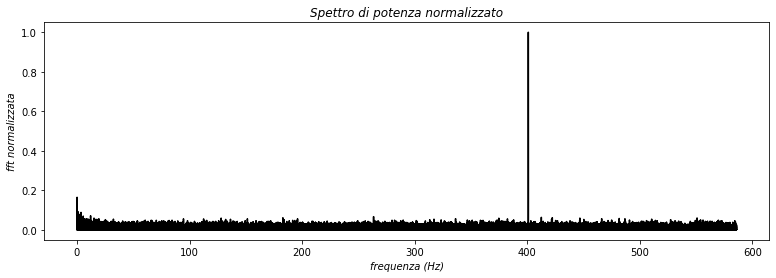

In [125]:
norm = fft_pezzo[peaks[-1]]        # Prende il valore delle y in corrispondenza della frequenza cercata

y_graf = y_final[50:300000] / norm # Normalizza i dati per ottenere un picco visibile
freq_graf = freq[50:300000]        # Taglia le prime frequenze per eliminare il picco al tempo zero

fig1, ax1 = plt.subplots()
fig1.set_figwidth(13)

ax1.plot(freq_graf, y_graf, color="black")

ax1.set_ylabel("fft normalizzata", style="italic")
ax1.set_xlabel("frequenza (Hz)", style="italic")
ax1.set_title("Spettro di potenza normalizzato", style="italic")

fig1.savefig("SpettroPotenza.jpg")

In [124]:
frequenza = freq[peaks[-1]]   # Hz
periodo = 1000 / frequenza       # ms   
print("Frequenza di pulsazione =", frequenza, "Hz")
print("Periodo =", periodo, "ms")  # ms

Frequenza di pulsazione = 400.99032997853493 Hz
Periodo = 2.493825724060553 ms
